In [1]:
''' 

Submitter : JESOON KANG, 20170937
Date : 2019. 10. 


    Assignment 4. 

-   -


'''
import matplotlib.pyplot as plt
import math
import numpy as np
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import torchvision
import os




In [2]:
# predict Function. if h(x) returns >=0.5, set to 1. other cases, set to 0.
def predict(h, labels) :
    mount = len(h)
    correct = 0
    
    for i in range(0,mount) :
        if h[i] >= 0.5 :
            if labels[i] == 1 :
                correct +=1
        else :
            if labels[i] == 0 :
                correct +=1
    return correct * (1/mount)

#### Section 2 END ####

In [3]:

#### Section 1. #### This Section is bringed Data_import_ex.py file.

# Image Data import & resize

transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

#train_data_path = 'relative path of training data set'
train_data_path = '../data/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=0)  


validation_data_path = '../data/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=True, num_workers=0)  

#### Section 1 END ####


In [4]:
#### Section 3 START ####
# Section 3 includes Data Pre-processing. ReDesign datasets to easy calculate

# Data reconstruct. vectorize

# Each Image file will be stored shape of a row
training_vectorized = []
training_labels = []

'''
tmp = 0
# Training data vectorizing
for i, data in enumerate(trainloader) :
    train_data = []
    inputs, labels = data
#    print(tmp)
    tmp += 1
    for u in inputs :
        for col in u[0] :
            train_data += list(col)
    training_vectorized.append(train_data)
    training_labels.append([labels])

training_vectorized = torch.Tensor(training_vectorized)
training_labels = torch.Tensor(training_labels)
print("train set is loaded")
'''


'\ntmp = 0\n# Training data vectorizing\nfor i, data in enumerate(trainloader) :\n    train_data = []\n    inputs, labels = data\n#    print(tmp)\n    tmp += 1\n    for u in inputs :\n        for col in u[0] :\n            train_data += list(col)\n    training_vectorized.append(train_data)\n    training_labels.append([labels])\n\ntraining_vectorized = torch.Tensor(training_vectorized)\ntraining_labels = torch.Tensor(training_labels)\nprint("train set is loaded")\n'

In [5]:
'''
validation_vectorized = []
validation_labels = []

# Validation data vectorizing
for i, data in enumerate(valloader) :
    val_data = []
    inputs, labels = data
    for u in inputs :
        for col in u[0] :
            val_data += list(col)
    validation_vectorized.append(val_data)
    validation_labels.append([labels])
validation_vectorized = torch.Tensor(validation_vectorized)
validation_labels = torch.Tensor(validation_labels)

#### Section 3 END ####
'''


'\nvalidation_vectorized = []\nvalidation_labels = []\n\n# Validation data vectorizing\nfor i, data in enumerate(valloader) :\n    val_data = []\n    inputs, labels = data\n    for u in inputs :\n        for col in u[0] :\n            val_data += list(col)\n    validation_vectorized.append(val_data)\n    validation_labels.append([labels])\nvalidation_vectorized = torch.Tensor(validation_vectorized)\nvalidation_labels = torch.Tensor(validation_labels)\n\n#### Section 3 END ####\n'

In [203]:

# sigmoid Function.
def sigmoid(z) :
    return 1 / (1 + torch.pow(math.e,-z)+0.000001)

def get_activation(z,type) :
    if (type == 0) :
        return sigmoid(z)
    else :
        print("Error, get_activation")
        return 0

def get_derv_activation(z,type) :
    if (type == 0) :
        return sigmoid(z)*(1-sigmoid(z))
    else :
        print("Error, get_derv_activation")
        return 0                                                                  

In [204]:

# log variables setting : to record statements
log_training_loss = []                                                                                                                                                                                  
log_validation_loss = []                                                                                                                                                                                                                                                                                                                                                                                       
log_training_acc = []
log_validation_acc = []


In [222]:
def get_loss(y,a) :
    #print(y,a)
    ret = -(torch.div(y,a+0.000001) - torch.div(1-y,1-a+0.000001))
    
    return ret

BATCH_SIZE = 100
FEATURE_SIZE = 10000
class ML :
    def __init__(self,L1_size,L2_size,L3_size,activation_type,lr) :
        self.l1_size = L1_size
        self.l2_size = L2_size
        self.l3_size = L3_size
        self.feature_size = 10000
        self.batch_size = 256
        self.t_batch_idx = 0
        self.epoch = 0
        self.lr = lr
        self.act_type = activation_type
        self.init_weights()
        
        print("ML Object initialized")
        self.iter = 0

        self.val_acc_log = []
        self.val_loss_log = []
        self.train_acc_log = []
        self.train_loss_log = []
        self.epoch_log = []
        
    def init_weights(self) :
        self.w_1 = torch.FloatTensor(self.l1_size,self.feature_size).uniform_(-1,1)
        self.b_1 = torch.FloatTensor(1,self.l1_size).uniform_(-1,1)
        
        #torch.FloatTensor(a, b).uniform_(r1, r2)
        
        self.w_2 = torch.FloatTensor(self.l2_size,self.l1_size).uniform_(-1,1)
        self.b_2 = torch.FloatTensor(1,self.l2_size).uniform_(-1,1)

        self.w_3 = torch.FloatTensor(self.l3_size,self.l2_size).uniform_(-1,1)
        self.b_3 = torch.FloatTensor(1,self.l3_size).uniform_(-1,1)

        

        
    def training(self) :
        for epoch in range(0,1000000):
            train_acc_log_tmp = []
            train_loss_log_tmp = []
            val_acc_log_tmp = []
            val_loss_log_tmp = []
            self.val_acc_log.append([0])
            self.val_loss_log.append([0])
            self.train_acc_log.append([0])
            self.train_loss_log.append([0])
            

            iter_ = 0
        # load training images of the batch size for every iteration
            for i, data in enumerate(trainloader):
                
                # inputs is the images
                # labels is the class of the image
                inputs, labels = data
                inputs, labels = inputs.float() , labels.float()
                # if you don't change the image size, it will be [batch_size, 1, 100, 100]

                # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
                
                self.t_data_batch = torch.squeeze(torch.FloatTensor(data[0]),3)
                
                self.t_data_batch = self.t_data_batch.view(len(data[0]),FEATURE_SIZE)
                self.z_1 = torch.matmul(self.t_data_batch,self.w_1.T) + self.b_1

                self.a_1 = get_activation(self.z_1,self.act_type)


                self.z_2 = torch.matmul(self.a_1,self.w_2.T) + self.b_2
                self.a_2 = get_activation(self.z_2,self.act_type) # 1027 x 50

                self.z_3 = torch.matmul(self.a_2,self.w_3.T) + self.b_3
                self.a_3 = get_activation(self.z_3,self.act_type) # 1027 x 1

                self.t_yh_batch = data[1].float().unsqueeze(1)

                acc = self.get_acc(self.a_3,self.t_yh_batch)
                loss = np.array(get_loss(self.t_yh_batch, self.a_3)).mean()
                
                train_acc_log_tmp.append([acc])
                train_loss_log_tmp.append([loss])
                
                self.update_weights(self.t_yh_batch,self.a_3)
            
            
            
            train_acc = np.array(train_acc_log_tmp).mean()
            train_loss = np.array(train_loss_log_tmp).mean()

            self.train_acc_log.append(train_acc)
            self.train_loss_log.append(train_loss)
            print("epoch : %s, loss : %s, tra_acc : %s"%(epoch,train_loss,train_acc))

           

            # load validation images of the batch size for every iteration
            for i, data in enumerate(valloader):

                # inputs is the image
                # labels is the class of the image
                inputs, labels = data
                inputs, labels = inputs.float() , labels.float()
                # if you don't change the image size, it will be [batch_size, 1, 100, 100]
                
                
                # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
                
                self.v_data_batch = torch.squeeze(torch.FloatTensor(data[0]),3)
                
                self.v_data_batch = self.v_data_batch.view(len(data[0]),FEATURE_SIZE)
                
                self.z_1 = torch.matmul(self.v_data_batch,self.w_1.T) + self.b_1

                self.a_1 = get_activation(self.z_1,self.act_type)


                self.z_2 = torch.matmul(self.a_1,self.w_2.T) + self.b_2
                self.a_2 = get_activation(self.z_2,self.act_type) # 1027 x 50

                self.z_3 = torch.matmul(self.a_2,self.w_3.T) + self.b_3
                self.a_3 = get_activation(self.z_3,self.act_type) # 1027 x 1

                self.v_yh_batch = data[1].float().unsqueeze(1)
                acc = self.get_acc(self.a_3,self.v_yh_batch)
                
                
                loss = np.array(get_loss(self.v_yh_batch, self.a_3)).mean()
                val_acc_log_tmp.append([acc])
                val_loss_log_tmp.append([loss])
            val_acc = np.array(val_acc_log_tmp).mean()
            val_loss = np.array(val_loss_log_tmp).mean()
            self.val_acc_log.append(val_acc)
            self.val_loss_log.append(val_loss)
            print("epoch : %s, loss : %s, val_acc : %s"%(epoch,val_loss,val_acc))

        self.epoch_log.append([iter_])
        iter_ += 1

        
    def update_weights(self,t_y,a_3) :
        error_wb3 = -(torch.div(t_y,a_3) - torch.div(1.0-t_y,1.0-a_3)) # sum ep
        d_z_3 = error_wb3*get_derv_activation(self.z_3,self.act_type) #         
        d_w_3 = torch.matmul(d_z_3.T,self.a_2)
        d_b_3 = torch.sum(d_z_3, dim=0, keepdim=True) / self.a_2.shape[0] # mean도 됨
        
        #########
        
        error_wb2 = torch.matmul(d_z_3,self.w_3)
        
        d_z_2 = error_wb2*get_derv_activation(self.z_2,self.act_type)
        
        d_w_2 = torch.matmul(d_z_2.T,self.a_1)
        d_b_2 = torch.sum(d_z_2, dim=0,keepdims=True) / self.a_1.shape[0]
        
   
        error_wb1 = torch.matmul(d_z_2,self.w_2)
        d_z_1 = error_wb1*get_derv_activation(self.z_1,self.act_type)
        d_w_1 = torch.matmul(d_z_1.T,self.t_data_batch)
        d_b_1 = torch.sum(d_z_1, dim=0,keepdims=True) / self.t_data_batch.shape[0]
        
        self.w_3 += -self.lr*d_w_3
        self.b_3 += -self.lr*d_b_3
        
        self.w_2 += -self.lr*d_w_2
        self.b_2 += -self.lr*d_b_2
        self.w_1 += -self.lr*d_w_1
        self.b_1 += -self.lr*d_b_1
        #print(b_3,b_2,b_1)
        
    def get_acc(self,yhat,y) :
        count = 0
      
        for a,b in zip(yhat,y) :
            if a >= 0.5 :
                if b == 1 :
                    count+=1
            else :
                if b == 0:
                    count +=1
        
        return count / len(yhat)

    def show_loss(self) :            
        t1 = plt.plot(self.epoch_log,self.train_loss_log, color='orange',label='Training Loss')
        t2 = plt.plot(self.epoch_log,self.val_loss_log, color= 'red',label='Validation Loss')
        plt.title("Loss")
        plt.legend(['Training Loss','Validation Loss'])
        plt.show()
    def show_acc(self) :
        t1 = plt.plot(self.epoch_log,self.train_acc_log, color='orange',label='Training Acc')
        t2 = plt.plot(self.epoch_log,self.val_acc_log, color= 'red',label='Validation Acc')
        plt.title("Accuracy")
        plt.legend(['Training Acc','Validation Acc'])
        plt.show()



In [223]:
'''
t_data = torch.FloatTensor(training_vectorized)
t_yh = torch.FloatTensor(training_labels)
v_data = torch.FloatTensor(validation_vectorized)
v_yh = torch.FloatTensor(validation_labels)
print(t_data.shape,t_yh.shape,v_data.shape,v_yh.shape)
'''
activation_type = 0 # 0 = sigmoid
learningRate = 0.0001
machine = ML(60,30,1,0,learningRate)

ML Object initialized


In [224]:
machine.training()

epoch : 0, loss : -2.663397, tra_acc : 0.48649831649831654
epoch : 0, loss : -2.7605314, val_acc : 0.513095238095238
epoch : 1, loss : -1.3821541, tra_acc : 0.4871380471380471
epoch : 1, loss : -1.5958029, val_acc : 0.5097619047619047
epoch : 2, loss : -0.791682, tra_acc : 0.45441077441077443
epoch : 2, loss : -1.1434234, val_acc : 0.4702380952380952
epoch : 3, loss : -0.41586983, tra_acc : 0.4474074074074074
epoch : 3, loss : -0.76253027, val_acc : 0.4469047619047619
epoch : 4, loss : -0.28816488, tra_acc : 0.44131313131313127
epoch : 4, loss : -0.56251687, val_acc : 0.47595238095238096
epoch : 5, loss : -0.16062978, tra_acc : 0.4406734006734006
epoch : 5, loss : -0.51788783, val_acc : 0.4423809523809524
epoch : 6, loss : -0.08693995, tra_acc : 0.4564983164983165
epoch : 6, loss : -0.37034312, val_acc : 0.430952380952381
epoch : 7, loss : -0.008183822, tra_acc : 0.47521885521885515
epoch : 7, loss : -0.316543, val_acc : 0.46261904761904765
epoch : 8, loss : 0.02156994, tra_acc : 0.494

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (0,) and (23,)

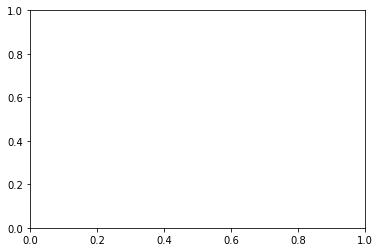

In [225]:
machine.show_loss()


In [ ]:
t1 = plt.plot(log_iter,log_acc, color='orange',label='Training Acc')
t2 = plt.plot(log_iter,log_acc, color= 'red',label='Validation Acc')
plt.title("Accuracy")
plt.legend(['Training Acc','Validation Acc'])
plt.show()